In [1]:
import pickle
import numpy as np
import os
import torch
import pandas as pd
import skfuzzy
from tqdm import tqdm
import argparse
from calibration_utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
from matplotlib import gridspec

# modify global setting
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams.update({'font.size': 45})
mpl.rc('text', usetex=True)

result_dir = './demo_results'

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
data = pd.read_csv('./paper_data/results/fuzzy_eval.csv', index_col = False)

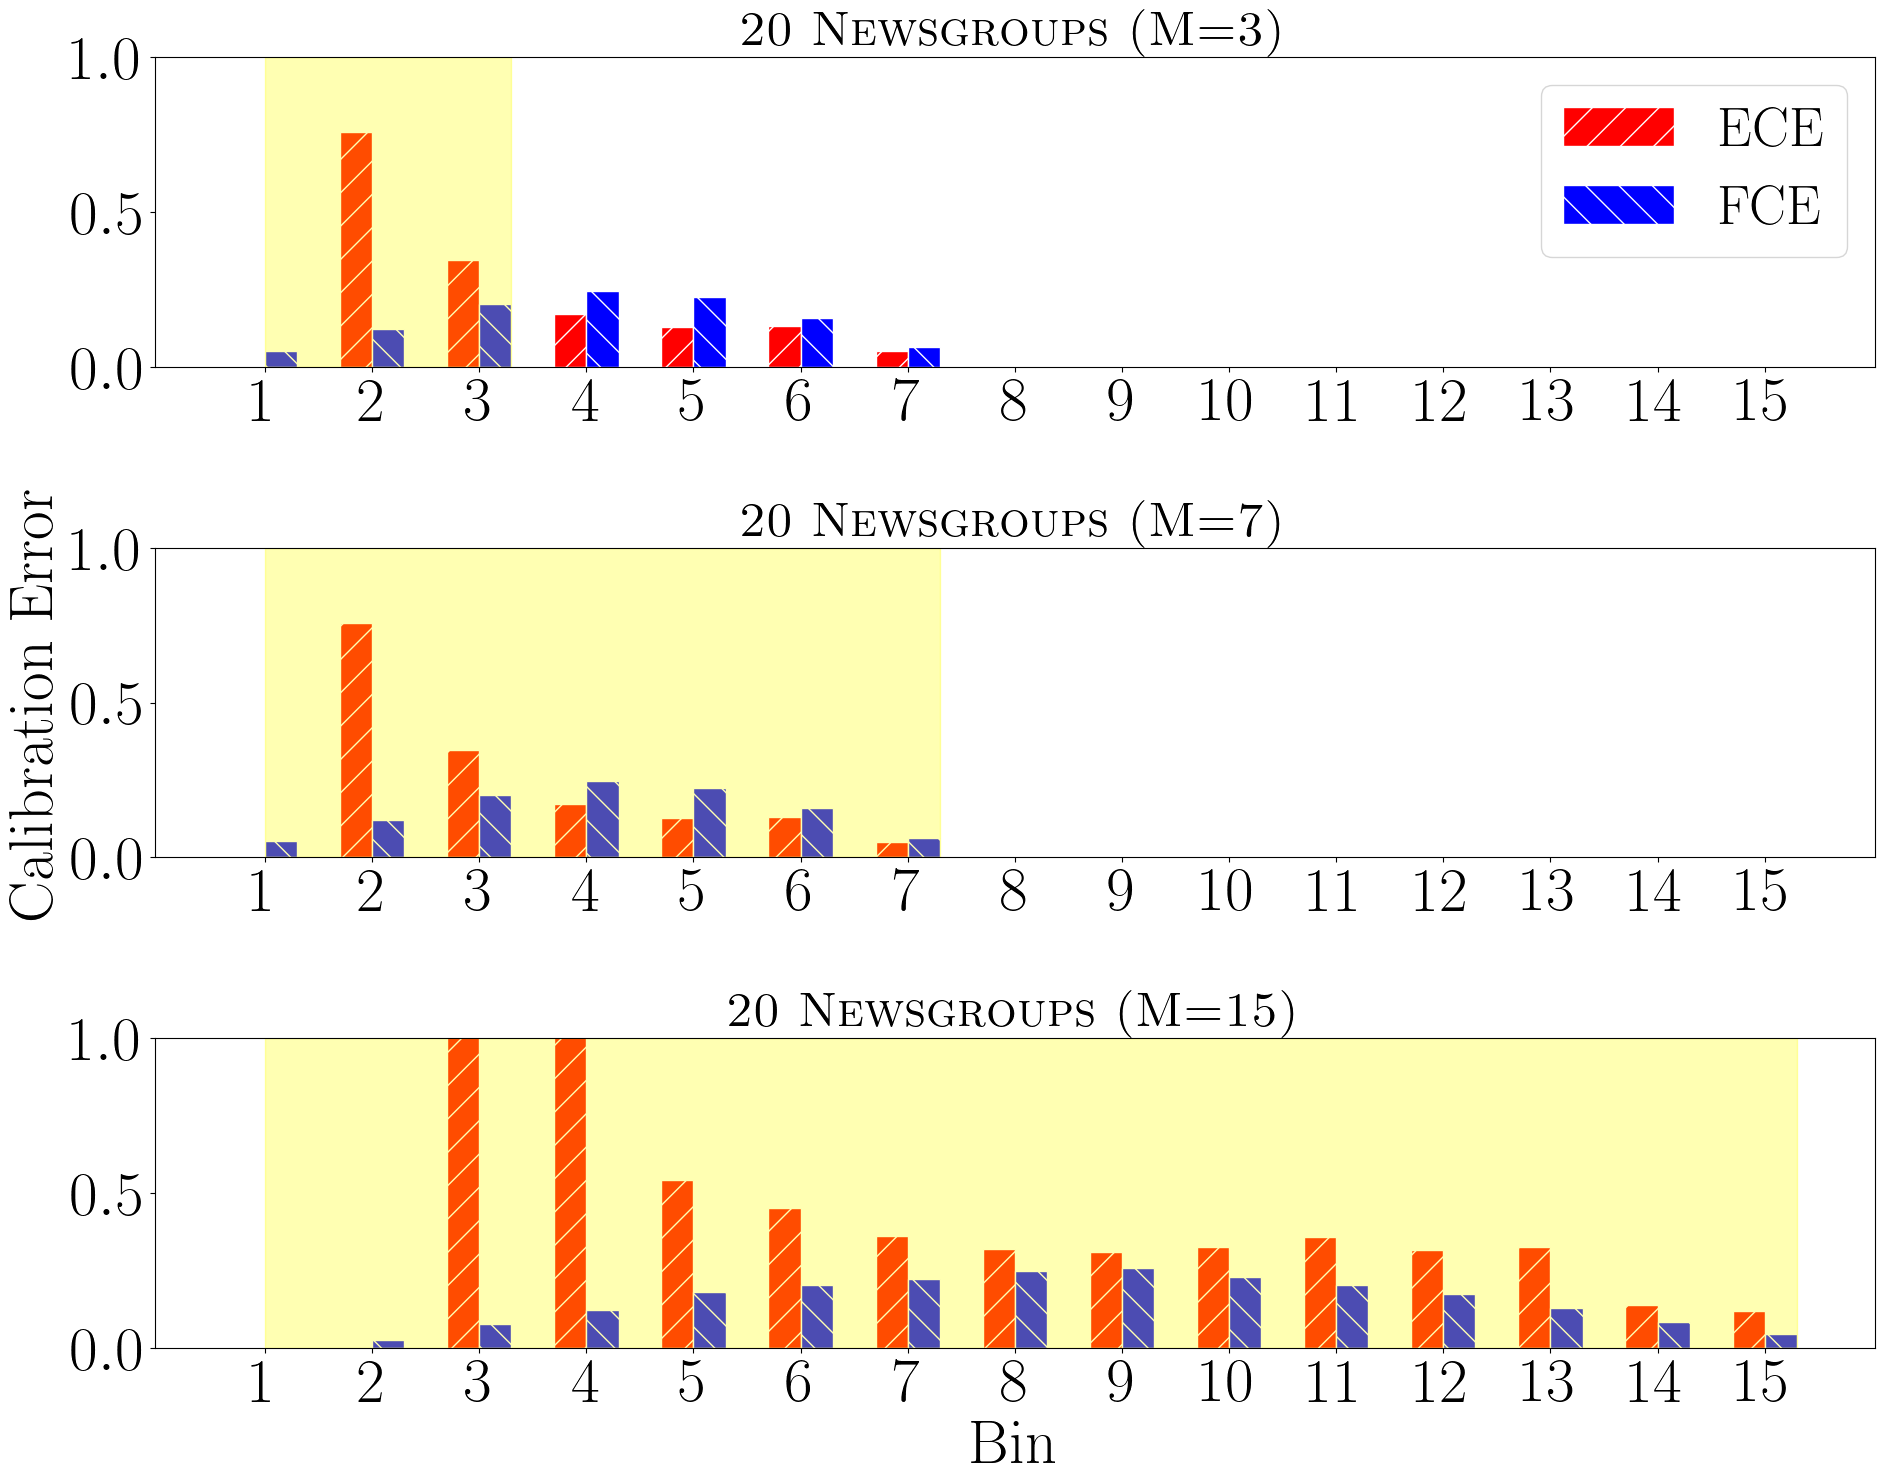

In [3]:
# ece vs fce binning difference across datasets (fig.2 (20newsgroups example) in paper)

n_size = 5000
n_bins = 7

fig, ax = plt.subplots(figsize=(20,16))
# set height ratios for subplots
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

data_f = data[(data['dataset'] == 'news') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]

x = np.arange(1, n_bins+1, 1)
y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
width = 0.3

# the first subplot
ax0 = plt.subplot(gs[0])
rect1 = ax0.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )

#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax0.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
               edgecolor='white'
               )

ax0.set_title(r'\textsc{20 Newsgroups (M=3)}', fontsize = 35)
ax0.set_xticks(np.arange(1, 4, 1))
ax0.axvspan(1, 3.3, alpha=0.3, color='yellow')

plt.legend(fontsize="40", loc='best')
plt.ylim(0, 1)

# the second subplot
n_size = 5000
n_bins = 7
data_f = data[(data['dataset'] == 'news') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]
y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
x = np.arange(1, 7+1, 1)
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
rect1 = ax1.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )
#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax1.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
               edgecolor='white')

ax1.set_title(r'\textsc{20 Newsgroups (M=7)}',  fontsize = 35)
ax1.set_xticks(np.arange(1, 8, 1))
ax1.axvspan(1, 7.3, alpha=0.3, color='yellow')


plt.ylabel(r'Calibration Error')
plt.ylim(0, 1)

# the third subplot
n_size = 5000
n_bins = 15
data_f = data[(data['dataset'] == 'news') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]

y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
x = np.arange(1, 15+1, 1)

# shared axis X
ax2 = plt.subplot(gs[2], sharex = ax1)
rect1 = ax2.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )

#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax2.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
                edgecolor='white'
               )

ax2.set_title(r'\textsc{20 Newsgroups (M=15)}', fontsize = 35)
ax2.set_xticks(np.arange(1, 16, 1))
ax2.axvspan(1, 15.3, alpha=0.3, color='yellow')


plt.ylim(0, 1)

plt.xlabel(r'Bin')
plt.tight_layout()

plt.show()


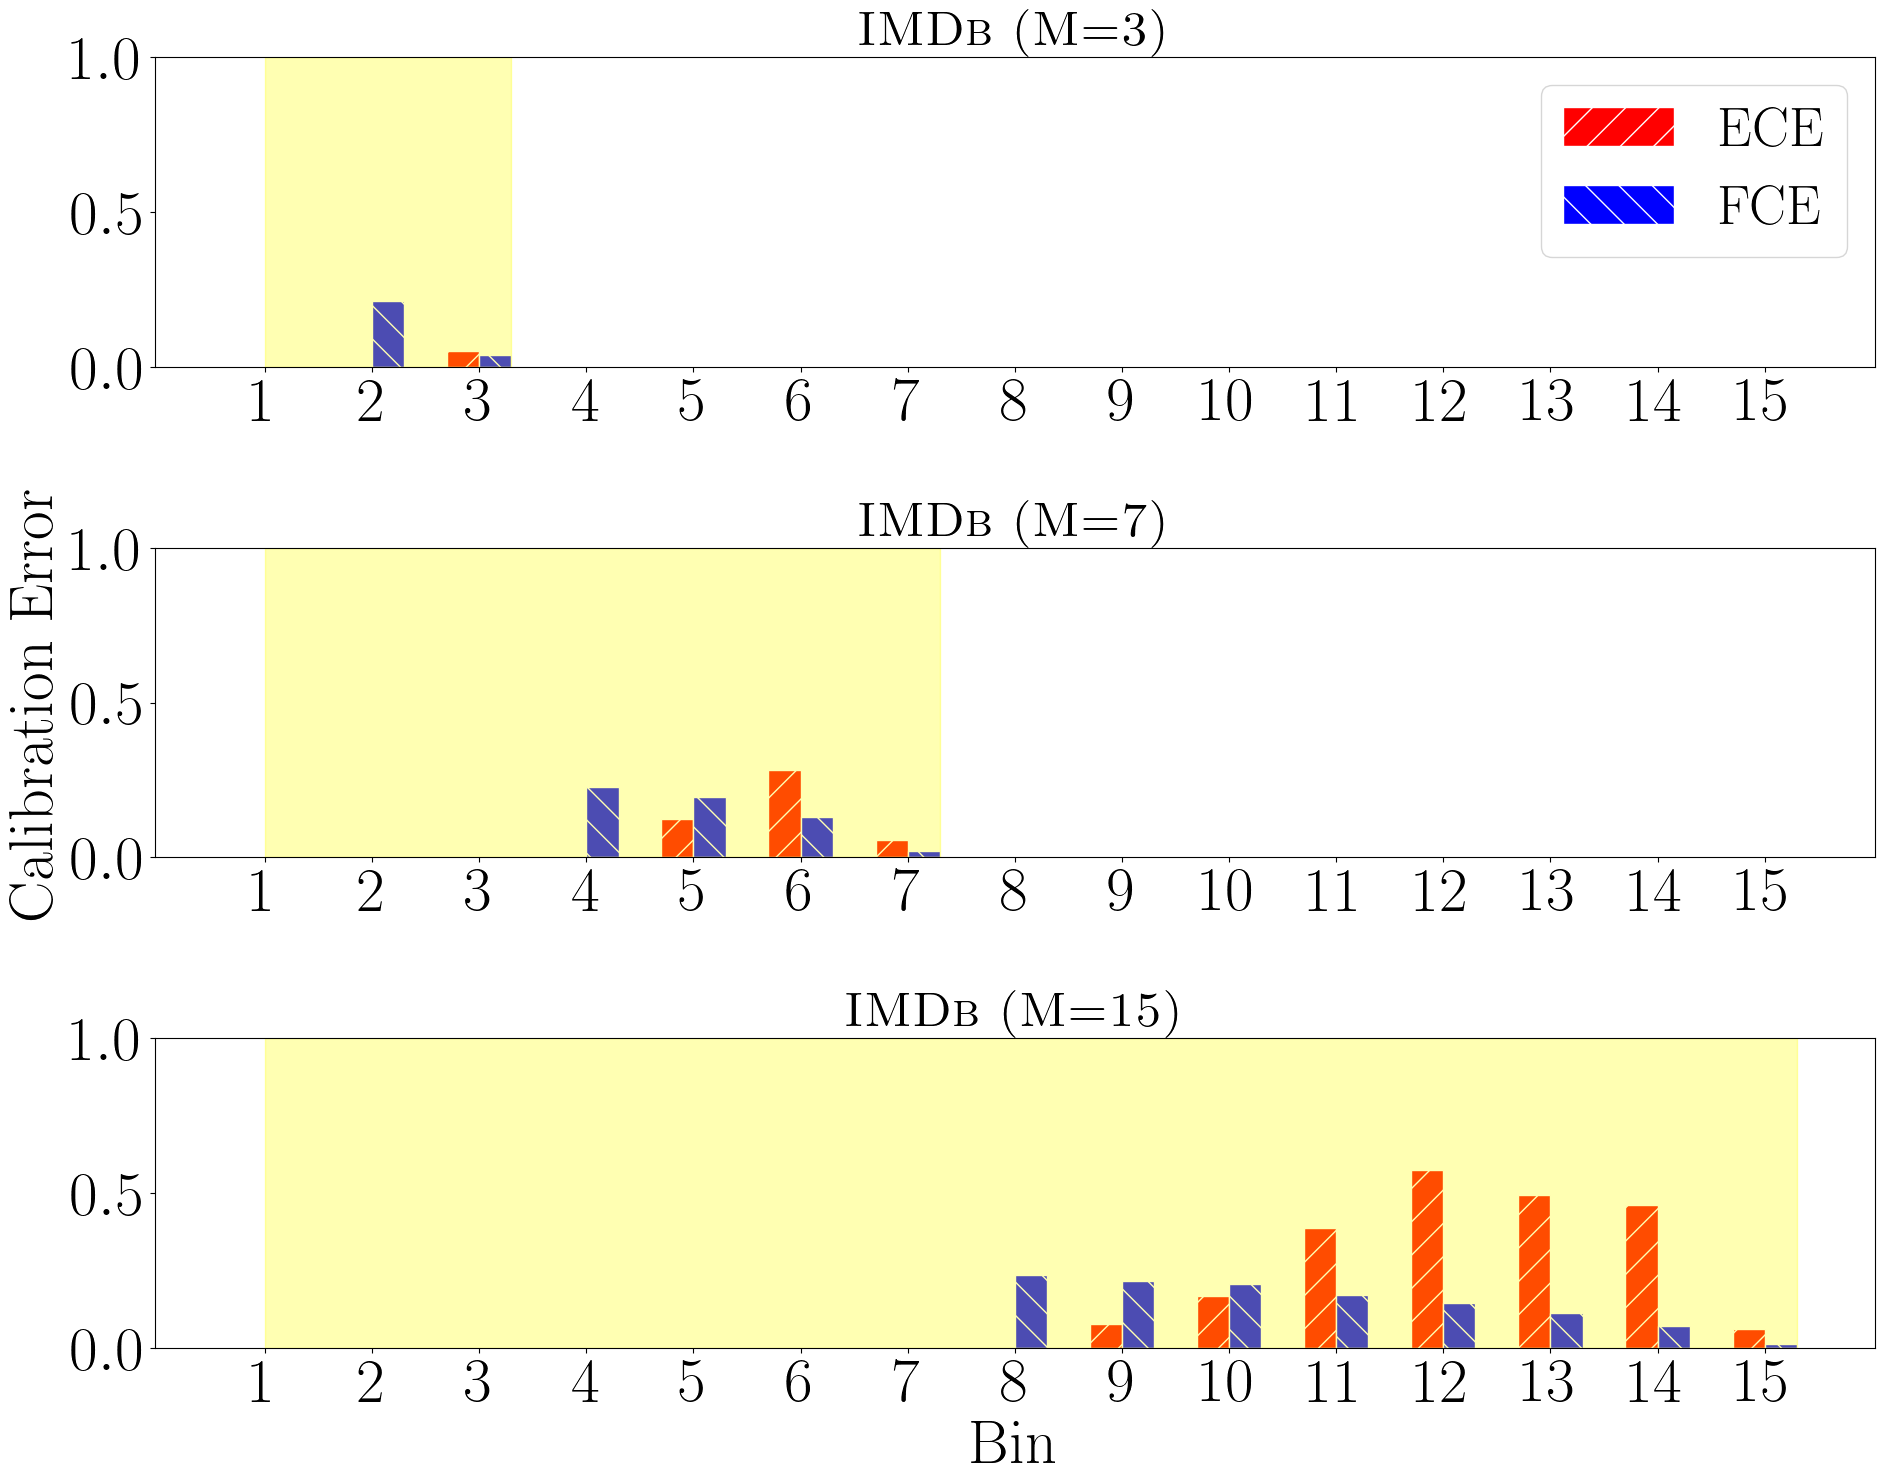

In [4]:
# ece vs fce binning difference across datasets (fig.2 (imdb example) in paper)

n_size = 5000
n_bins = 3

fig, ax = plt.subplots(figsize=(20,16))
# set height ratios for subplots
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

data_f = data[(data['dataset'] == 'imdb') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]

x = np.arange(1, n_bins+1, 1)
y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
width = 0.3

# the first subplot
ax0 = plt.subplot(gs[0])
rect1 = ax0.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )

#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax0.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
               edgecolor='white'
               )

ax0.set_title(r'\textsc{IMDb (M=3)}', fontsize = 35)
ax0.set_xticks(np.arange(1, 4, 1))
ax0.axvspan(1, 3.3, alpha=0.3, color='yellow')

plt.legend(fontsize="40", loc='best')
plt.ylim(0, 1)

# the second subplot
n_size = 5000
n_bins = 7
data_f = data[(data['dataset'] == 'imdb') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]
y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
x = np.arange(1, 7+1, 1)
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
rect1 = ax1.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )
#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax1.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
               edgecolor='white')

ax1.set_title(r'\textsc{IMDb (M=7)}',  fontsize = 35)
ax1.set_xticks(np.arange(1, 8, 1))
ax1.axvspan(1, 7.3, alpha=0.3, color='yellow')


plt.ylabel(r'Calibration Error')
plt.ylim(0, 1)

# the third subplot
n_size = 5000
n_bins = 15
data_f = data[(data['dataset'] == 'imdb') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]

y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
x = np.arange(1, 15+1, 1)

# shared axis X
ax2 = plt.subplot(gs[2], sharex = ax1)
rect1 = ax2.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )

#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax2.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
                edgecolor='white'
               )

ax2.set_title(r'\textsc{IMDb (M=15)}', fontsize = 35)
ax2.set_xticks(np.arange(1, 16, 1))
ax2.axvspan(1, 15.3, alpha=0.3, color='yellow')


plt.ylim(0, 1)

plt.xlabel(r'Bin')
plt.tight_layout()

plt.show()


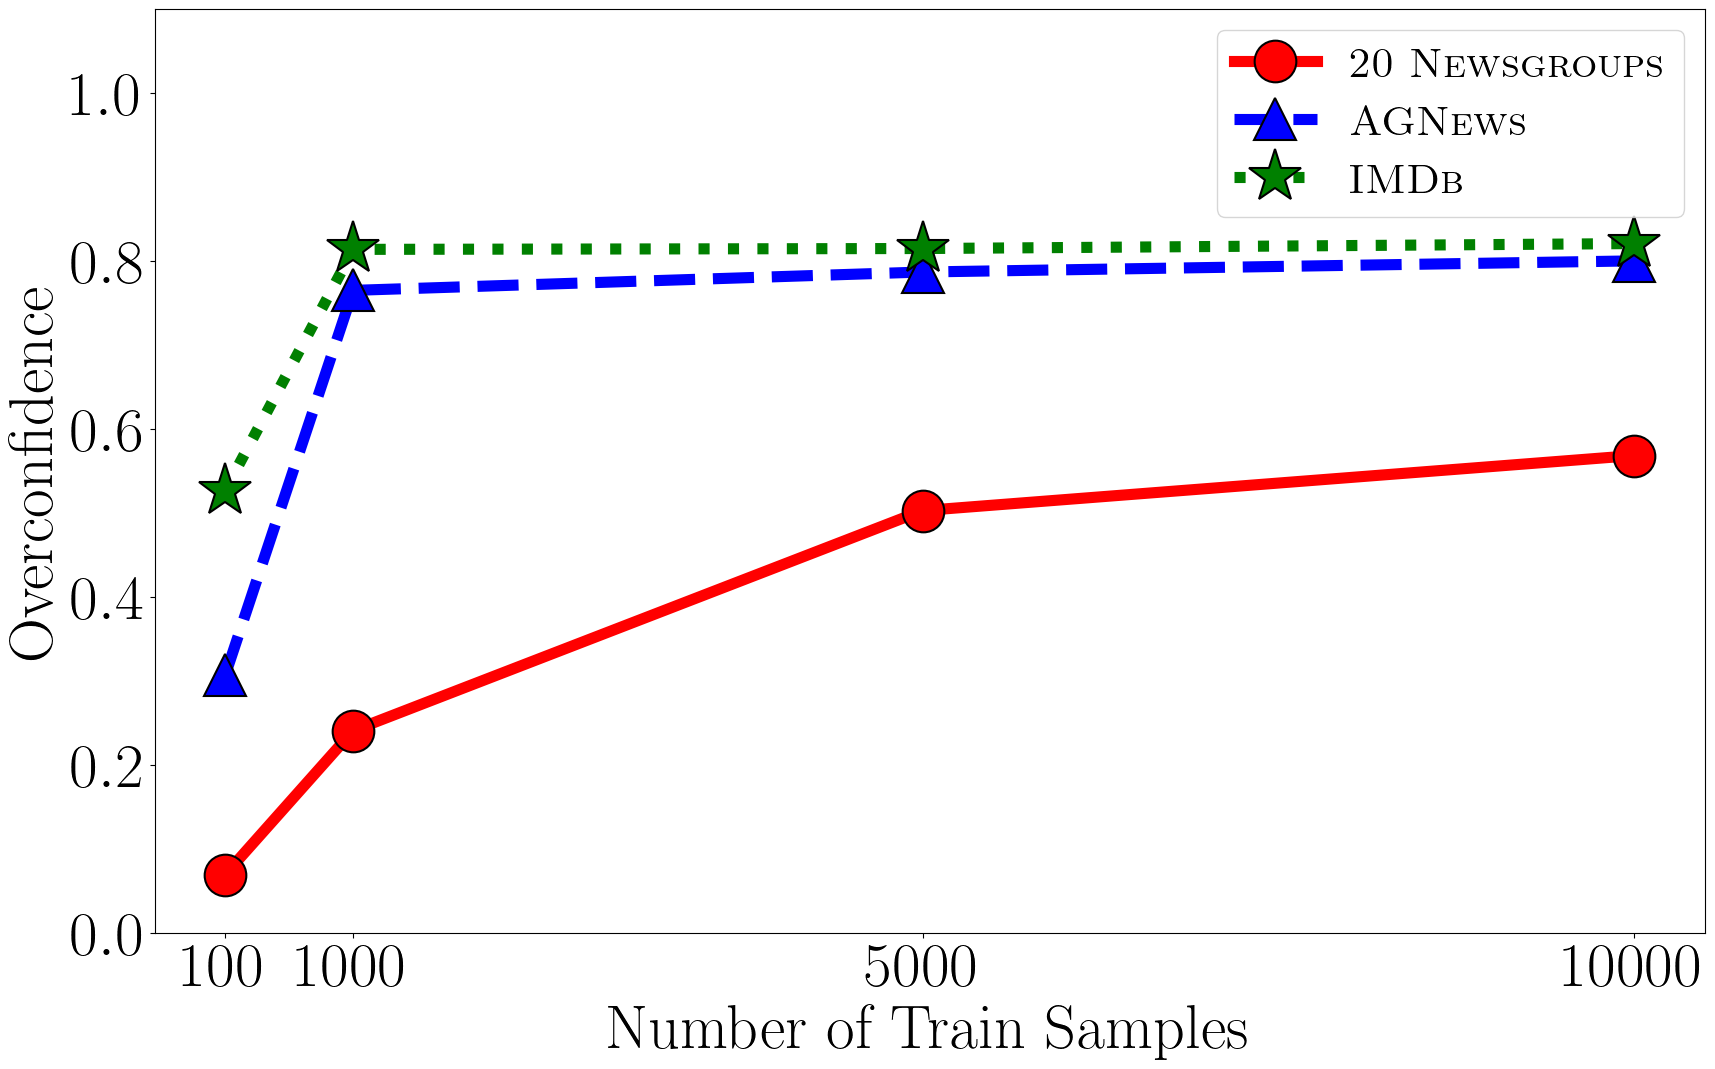

In [5]:
# Variation in model overconfidence (fig. 3 in paper)

fig, ax = plt.subplots(figsize=(20,12))

n_bins = 15
plt.plot(data[(data['dataset'] == 'news') & (data['bins'] == n_bins)]['size'], 
         data[(data['dataset'] == 'news') & (data['bins'] == n_bins)]['of'], c = 'red',
            linestyle='-', lw = 8, marker='o', markersize=30, markeredgewidth=1.5, markeredgecolor = 'black',
         label = r'\textsc{20 Newsgroups}')
plt.plot(data[(data['dataset'] == 'agnews') & (data['bins'] == n_bins)]['size'], 
         data[(data['dataset'] == 'agnews') & (data['bins'] == n_bins)]['of'], c = 'blue',
            linestyle='--', lw = 8, marker='^', markersize=30, markeredgewidth=1.5, markeredgecolor = 'black',
         label = r'\textsc{AGNews}')
plt.plot(data[(data['dataset'] == 'imdb') & (data['bins'] == n_bins)]['size'], 
         data[(data['dataset'] == 'imdb') & (data['bins'] == n_bins)]['of'], c = 'green',
            linestyle=':', lw = 8, marker='*', markersize=40, markeredgewidth=1.5, markeredgecolor = 'black',
         label = r'\textsc{IMDb}')

plt.ylim(0, 1.1)

plt.xlabel(r'Number of Train Samples')
plt.ylabel(r'Overconfidence')
plt.legend(fontsize = 30)
plt.xticks([100, 1000, 5000, 10000])

plt.show()


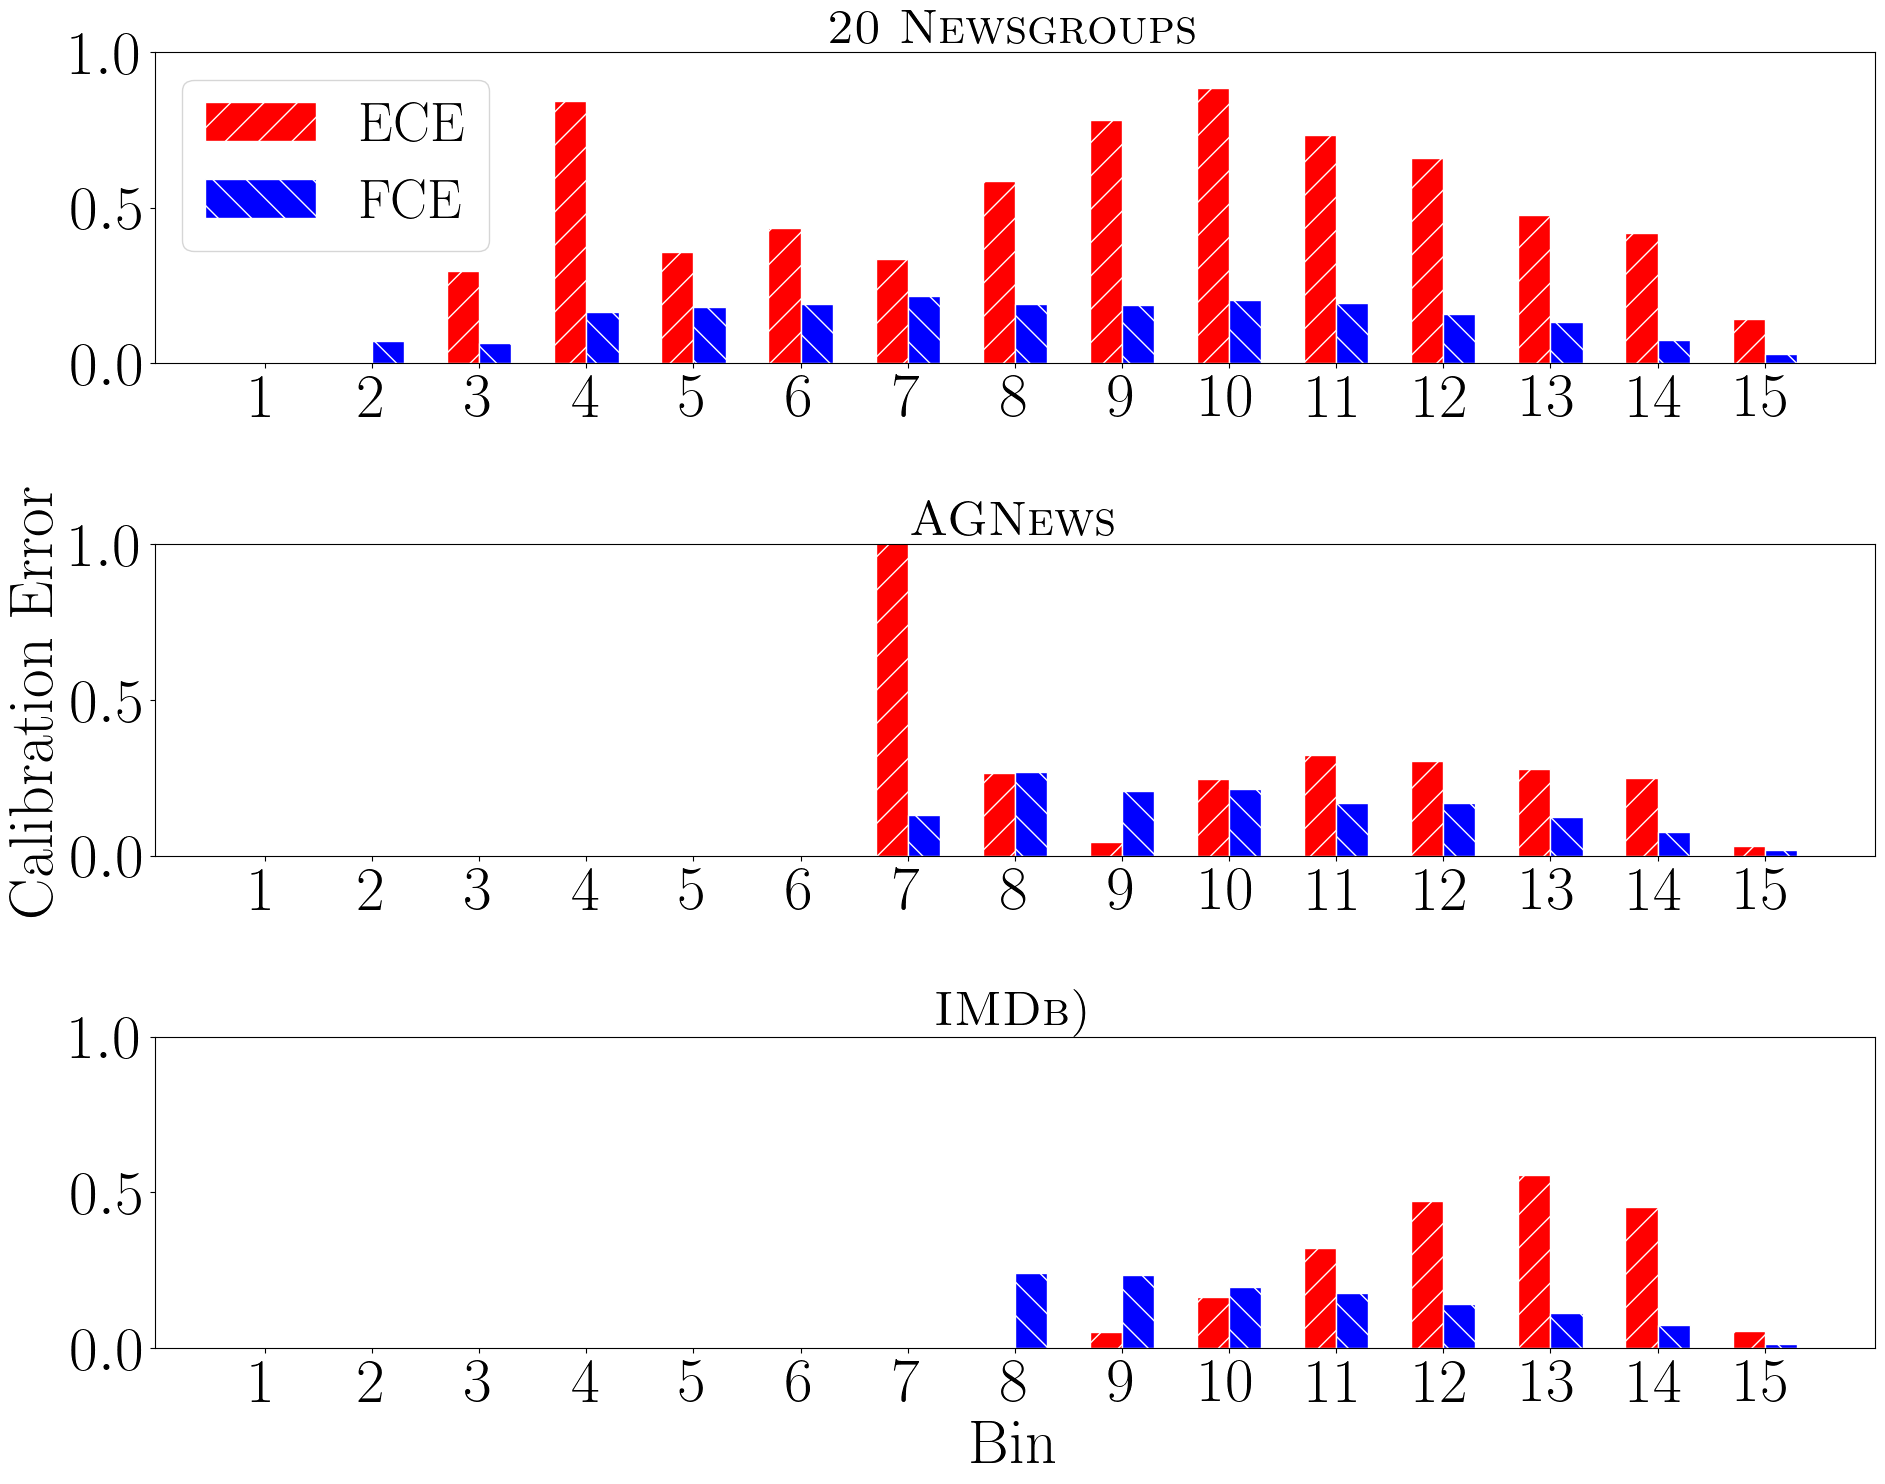

In [6]:
# Binning of prediction probabilities across M = 15 bins (fig. 4 in paper)

fig, ax = plt.subplots(figsize=(20,16))
# set height ratios for subplots
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

n_size = 10000
n_bins = 15

data_f = data[(data['dataset'] == 'news') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]

x = np.arange(1, n_bins+1, 1)
y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
width = 0.3

# the first subplot
ax0 = plt.subplot(gs[0])
rect1 = ax0.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )

#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax0.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
               edgecolor='white'
               )

ax0.set_title(r'\textsc{20 Newsgroups}', fontsize = 35)
ax0.set_xticks(np.arange(1, 4, 1))
plt.legend(fontsize="40", loc='best')
plt.ylim(0, 1)

# the second subplot
data_f = data[(data['dataset'] == 'agnews') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]
y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
x = np.arange(1, n_bins+1, 1)
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
rect1 = ax1.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )
#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax1.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
               edgecolor='white')

ax1.set_title(r'\textsc{AGNews}',  fontsize = 35)
ax1.set_xticks(np.arange(1, 8, 1))

plt.ylabel(r'Calibration Error')
plt.ylim(0, 1)

# the third subplot
data_f = data[(data['dataset'] == 'imdb') & (data['size'] == n_size)
              & (data['bins'] == n_bins)][['ece_breakdown', 'fce_breakdown']]

y = [float(x) for x in data_f['ece_breakdown'].iloc[0].strip('][').split(', ')]
x = np.arange(1, n_bins+1, 1)

# shared axis X
ax2 = plt.subplot(gs[2], sharex = ax1)
rect1 = ax2.bar(x - width/2,
              y,
              width = width, 
               label = r'ECE',
               color = 'red',
                hatch = '/',
                edgecolor='white'
              )

#create the second bar
y = [float(x) for x in data_f['fce_breakdown'].iloc[0].strip('][').split(', ')]

rect2 = ax2.bar(x + width/2,
              y,
              width = width,
              label = r'FCE',
              color = 'blue',
               hatch = '\\',
                edgecolor='white'
               )

ax2.set_title(r'\textsc{IMDb)}', fontsize = 35)
ax2.set_xticks(np.arange(1, 16, 1))


plt.ylim(0, 1)

plt.xlabel(r'Bin')
plt.tight_layout()

plt.show()

